# Relatório de Análise de Regressão

## Nome:Maverick Alekyne de Sousa Ribeiro
## Professora: Elisângela Rodrigues
## Semestre: 4°

# Introdução

In [ ]:
O conjunto de dados

In [101]:
#bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import f_oneway


### Pré-Processamento

#carregando a base de dados
df = pd.read_csv('C:/Users/MASTER/Downloads/train.csv')


df.head(15)






,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
5,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
6,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
7,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95
8,10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,10.65 Lakh,9.95
9,11,Honda City 1.5 V AT Sunroof,Kolkata,2012,60000,Petrol,Automatic,First,16.8 kmpl,1497 CC,116.3 bhp,5.0,NaN,4.49


In [102]:
# Verifique se há valores ausentes
print(df.isnull().sum())
df = df.dropna()


Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  38
New_Price            5032
Price                   0
dtype: int64


In [103]:
# Extrair apenas o valor numérico de "Mileage"
df['Mileage'] = df['Mileage'].str.extract('(\d+\.\d+)').astype(float)
df['Engine'] = df['Engine'].str.extract('(\d+)')
df['Power'] = df['Power'].str.extract('(\d+\.\d+)')

In [104]:
df['Mileage'].fillna(df['Mileage'].median(), inplace=True)
df['Engine'].fillna(df['Engine'].median(), inplace=True)
df['Power'].fillna(df['Power'].median(), inplace=True)
df['Seats'].fillna(df['Seats'].median(), inplace=True)


In [105]:
df.dropna(subset=['New_Price'], inplace=True)  # Remova linhas com valores ausentes em 'New_Price'


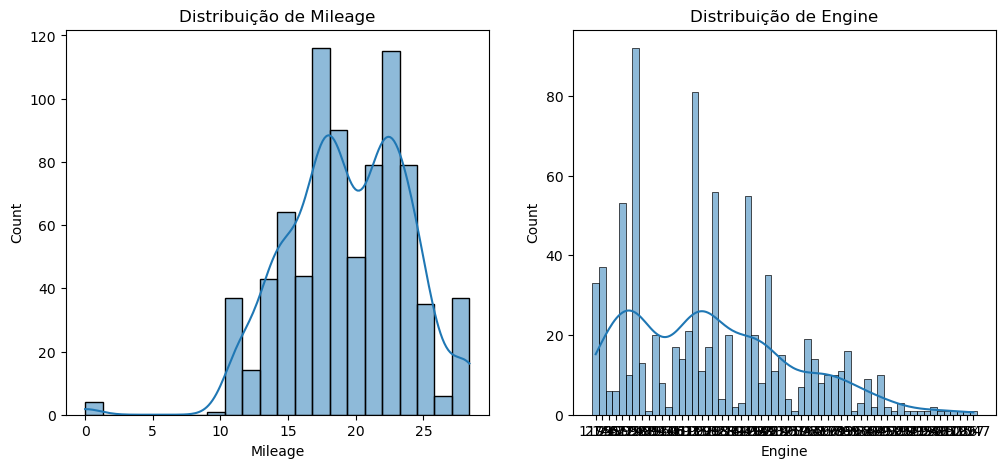

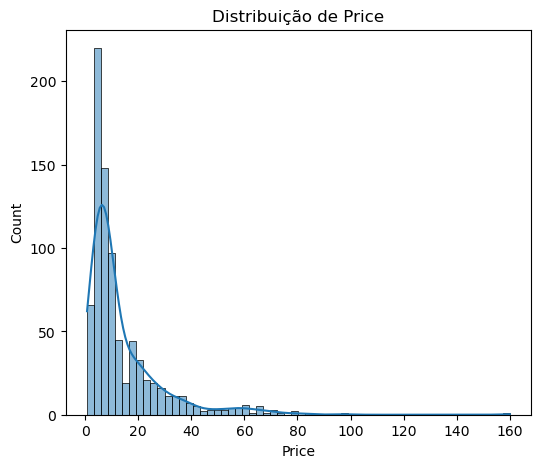

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize a distribuição atual das variáveis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Mileage'], kde=True)
plt.title('Distribuição de Mileage')
plt.subplot(1, 2, 2)
sns.histplot(df['Engine'], kde=True)
plt.title('Distribuição de Engine')
plt.show()

# Distribuição da variável resposta
plt.figure(figsize=(6, 5))
sns.histplot(df['Price'], kde=True)
plt.title('Distribuição de Price')
plt.show()


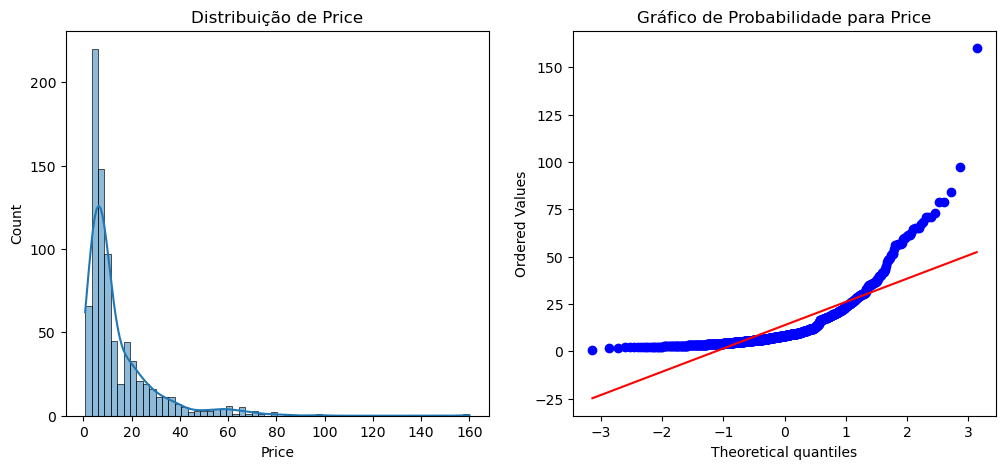

Teste de Shapiro-Wilk para Price:
Estatística de teste: 0.6789098381996155
Valor p: 1.3565103645950461e-36


In [108]:
import seaborn as sns
from scipy import stats

# Verifique a normalidade da variável resposta "Price" com um histograma e um gráfico de probabilidade
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], kde=True)
plt.title('Distribuição de Price')
plt.subplot(1, 2, 2)
stats.probplot(df['Price'], dist='norm', plot=plt)
plt.title('Gráfico de Probabilidade para Price')
plt.show()

# Teste de normalidade de Shapiro-Wilk
shapiro_test_price = stats.shapiro(df['Price'])
print("Teste de Shapiro-Wilk para Price:")
print("Estatística de teste:", shapiro_test_price[0])
print("Valor p:", shapiro_test_price[1])


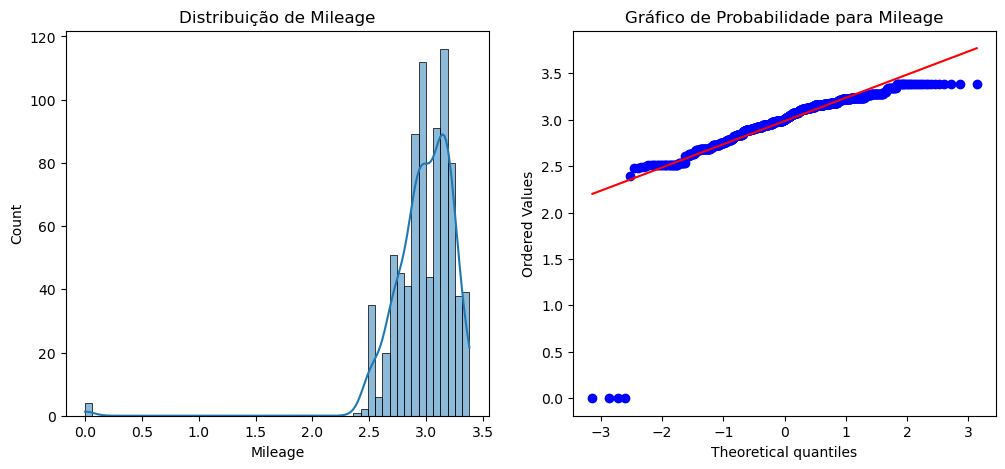

Teste de Shapiro-Wilk para Mileage:
Estatística de teste: 0.6921770572662354
Valor p: 5.0086380076375016e-36


In [109]:
# Verifique a normalidade da variável explicativa "Mileage" com um histograma e um gráfico de probabilidade
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Mileage'], kde=True)
plt.title('Distribuição de Mileage')
plt.subplot(1, 2, 2)
stats.probplot(df['Mileage'], dist='norm', plot=plt)
plt.title('Gráfico de Probabilidade para Mileage')
plt.show()

# Teste de normalidade de Shapiro-Wilk
shapiro_test_mileage = stats.shapiro(df['Mileage'])
print("Teste de Shapiro-Wilk para Mileage:")
print("Estatística de teste:", shapiro_test_mileage[0])
print("Valor p:", shapiro_test_mileage[1])

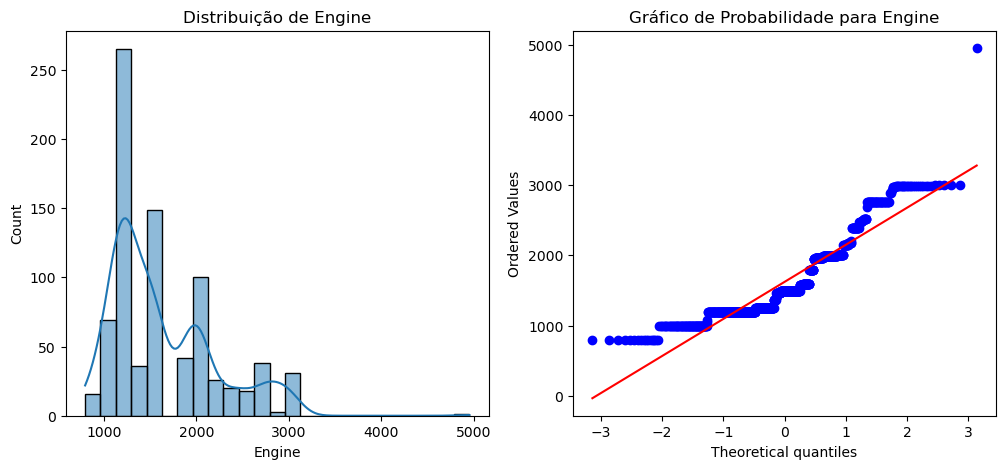

Teste de Shapiro-Wilk para Engine:
Estatística de teste: 0.8779627680778503
Valor p: 9.428006027724242e-25


In [111]:
import seaborn as sns
from scipy import stats

# Verifique a normalidade da variável explicativa "Engine" após lidar com valores ausentes
df['Engine'] = df['Engine'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Engine'], kde=True)
plt.title('Distribuição de Engine')
plt.subplot(1, 2, 2)
stats.probplot(df['Engine'].dropna(), dist='norm', plot=plt)
plt.title('Gráfico de Probabilidade para Engine')
plt.show()

# Teste de normalidade de Shapiro-Wilk
shapiro_test_engine = stats.shapiro(df['Engine'].dropna())
print("Teste de Shapiro-Wilk para Engine:")
print("Estatística de teste:", shapiro_test_engine[0])
print("Valor p:", shapiro_test_engine[1])


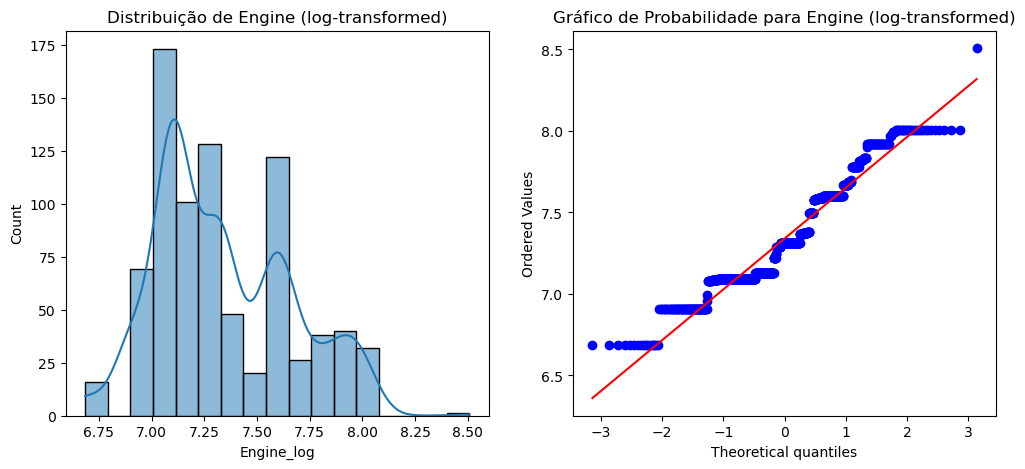

Teste de Shapiro-Wilk para Engine (log-transformed):
Estatística de teste: 0.9413667321205139
Valor p: 2.1389825231992327e-17


In [112]:
import numpy as np
import seaborn as sns
from scipy import stats

# Aplicar a transformação logarítmica à variável "Engine"
df['Engine_log'] = np.log1p(df['Engine'])

# Verificar a normalidade da variável transformada "Engine_log"
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Engine_log'], kde=True)
plt.title('Distribuição de Engine (log-transformed)')
plt.subplot(1, 2, 2)
stats.probplot(df['Engine_log'].dropna(), dist='norm', plot=plt)
plt.title('Gráfico de Probabilidade para Engine (log-transformed)')
plt.show()

# Teste de normalidade de Shapiro-Wilk para a variável transformada "Engine_log"
shapiro_test_engine_log = stats.shapiro(df['Engine_log'].dropna())
print("Teste de Shapiro-Wilk para Engine (log-transformed):")
print("Estatística de teste:", shapiro_test_engine_log[0])
print("Valor p:", shapiro_test_engine_log[1])
